In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import median_test
from scipy.stats import kruskal

In [2]:
#load the data
survey = pd.read_csv('/Users/admin/Documents/Thinkful_Projects/ESSdata_Thinkful.csv')

In [3]:
survey.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [4]:
survey.shape

(8594, 13)

In [5]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [6]:
# fill null values with the means
survey[['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'sclmeet', 'happy', 'sclact']] = survey[['tvtot', 'ppltrst', 'pplfair', 'pplhlp', 'sclmeet','happy', 'sclact']].apply(lambda x: x.fillna(x.mean()))

In [7]:
# address the null values, fill in with the most frequent value
survey[['partner', 'gndr']] = survey[['partner', 'gndr']].apply(lambda x: x.fillna(x.value_counts().index[0]))

In [8]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8594 non-null float64
ppltrst    8594 non-null float64
pplfair    8594 non-null float64
pplhlp     8594 non-null float64
happy      8594 non-null float64
sclmeet    8594 non-null float64
sclact     8594 non-null float64
gndr       8594 non-null float64
agea       8355 non-null float64
partner    8594 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [9]:
# we have two values for the year category, a brief research tells us that round 6 corresponds to year 2012 
# and round 7 is from 2014

np.unique(survey['year'])

array([6, 7])

### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [10]:
# unique countries
np.unique(survey.cntry, return_counts=True)

(array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object),
 array([1546, 1316,   28, 2426, 1462, 1816]))

In [11]:
survey['ppltrst'].isnull().sum()

0

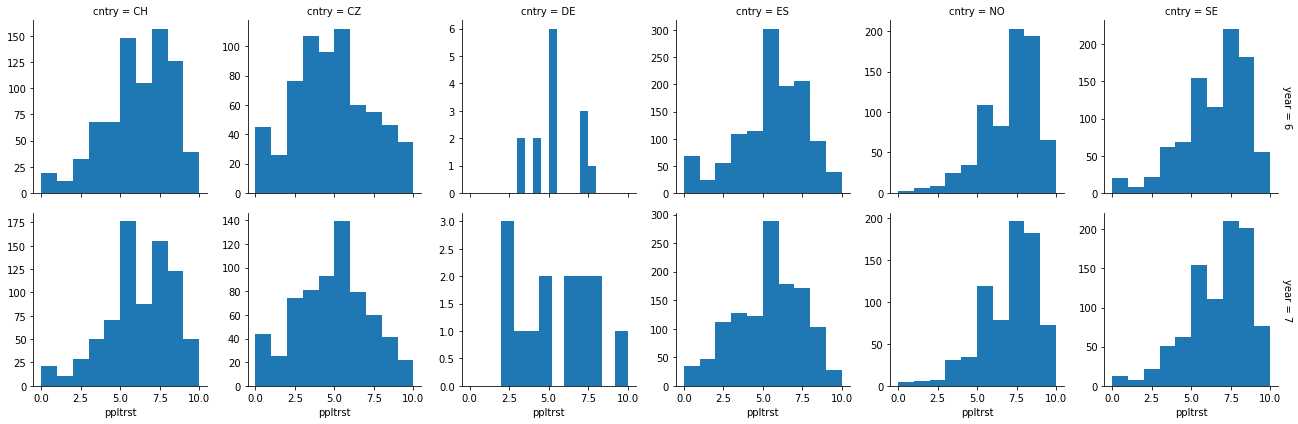

In [12]:
g = sns.FacetGrid(data=survey,
                 col = 'cntry',
                 row='year',
                 margin_titles=True,
                 sharey=False)  #to make sure we can still see Germany
g = g.map(plt.hist, 'ppltrst')
plt.show()

### Shapiro-Wilk Test for Normality

Shapiro-Wilk test for normality returns very small p-values (way lower than 0.05 significance level), except for Germany (which has a small sample number - 28 datapoints total). Therefore, it makes sense to use non-parametric distribution comparison tests.

In [13]:
countries = ['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']

In [14]:
#Shaprio-Wilk Tests for normality
for country in countries:
    for year in [6, 7]:
        print(country, year,':', 
              stats.shapiro(survey[survey['year']==year][survey['cntry']==country]['ppltrst']))

CH 6 : (0.9519361853599548, 3.4958809444132896e-15)
CH 7 : (0.9538647532463074, 7.692136586977955e-15)
CZ 6 : (0.9687360525131226, 1.233489699270507e-10)
CZ 7 : (0.9720805287361145, 7.076046970588834e-10)
DE 6 : (0.9013110399246216, 0.1178363636136055)
DE 7 : (0.9425466060638428, 0.4519253373146057)
ES 6 : (0.9496549367904663, 5.989953442559737e-20)
ES 7 : (0.9664199352264404, 3.8589161421724897e-16)
NO 6 : (0.9216307401657104, 4.909956966501182e-19)
NO 7 : (0.9299473166465759, 5.5013681502145986e-18)
SE 6 : (0.935847818851471, 2.5399596589630506e-19)
SE 7 : (0.9398238658905029, 1.0416553104982269e-18)


The p-value for Germany is over 0.05, however, we have very few datapoints. Therefore, we will do non-parametric tests for all countries.

### Kruskal-Wallis Test for Two Independent Groups (A/B Test)

In [15]:
for country in countries:
    print(country, ':', 
          kruskal(survey[survey['year']==6][survey['cntry']==country]['ppltrst'], 
          survey[survey['year']==7][survey['cntry']==country]['ppltrst']))

CH : KruskalResult(statistic=0.3016359964448019, pvalue=0.5828586111442048)
CZ : KruskalResult(statistic=0.5340306520300221, pvalue=0.4649172016371461)
DE : KruskalResult(statistic=0.03493591039585809, pvalue=0.8517300191250199)
ES : KruskalResult(statistic=8.149961651374431, pvalue=0.004306207168095373)
NO : KruskalResult(statistic=0.24569560721491657, pvalue=0.620122374635789)
SE : KruskalResult(statistic=4.335895080514051, pvalue=0.037316790239688535)


### Spain

In [16]:
# mean trust score in 2012
print('Mean trust score in Spain in 2012:', survey[survey['year']==6][survey['cntry']=='ES']['ppltrst'].mean())

Mean trust score in Spain in 2012: 5.114591920857379


In [17]:
# mean trust score in 2014
print('Mean trust score in Spain in 2014:', survey[survey['year']==7][survey['cntry']=='ES']['ppltrst'].mean())

Mean trust score in Spain in 2014: 4.896224083693169


### Sweden

In [18]:
# mean trust score in 2012
print('Mean trust score in Sweden in 2012:', survey[survey['year']==6][survey['cntry']=='SE']['ppltrst'].mean())

Mean trust score in Sweden in 2012: 6.057400675682614


In [19]:
# mean trust score in 2012
print('Mean trust score in Sweden in 2014:', survey[survey['year']==7][survey['cntry']=='SE']['ppltrst'].mean())

Mean trust score in Sweden in 2014: 6.257709251101321


**Conclusion:** the only statistically significant differences in trust occured in Spain (ES, p-value of appr. 0.007, we have to reject the null hypotheis of no change) and Sweden (p-value of 0.03, also reject the null hypothesis of no change). Trust in Spain declined whereas trust in Sweden increased. Changes in other countries were not statistically significant (p-values over 0.05).

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

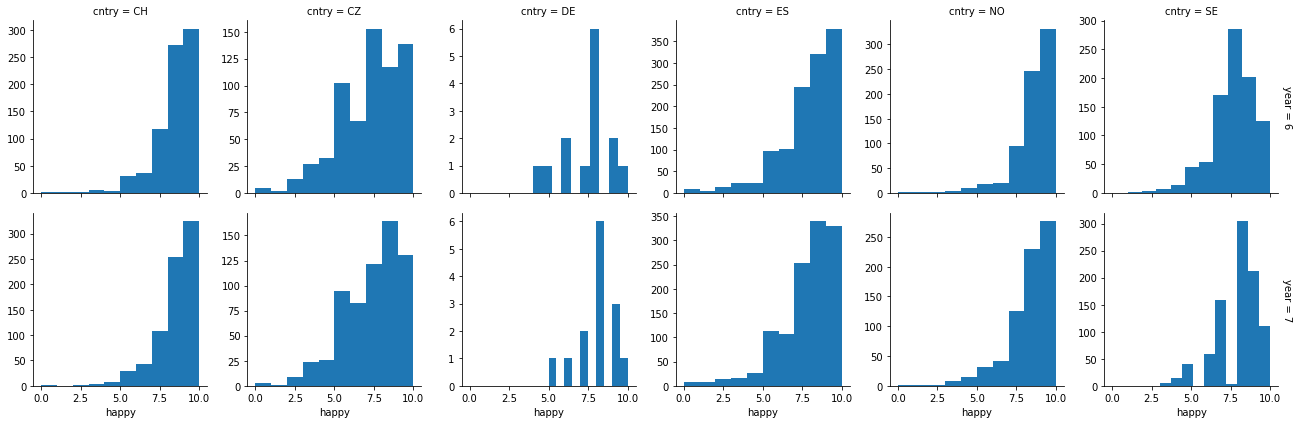

In [20]:
g = sns.FacetGrid(data=survey,
                 col = 'cntry',
                 row='year',
                 margin_titles=True,
                 sharey=False)  #to make sure we can still see Germany
g = g.map(plt.hist, 'happy')
plt.show()

### Shapiro-Wilk

In [21]:
#Shapiro-Wilk Tests for normality
for country in countries:
    for year in [6, 7]:
        print(country,year, ':', 
              stats.shapiro(survey[survey['year']==year][survey['cntry']==country]['happy']))

CH 6 : (0.879397451877594, 5.1566204432223734e-24)
CH 7 : (0.8895691633224487, 4.494222618578247e-23)
CZ 6 : (0.9479058980941772, 1.8463171868655405e-14)
CZ 7 : (0.9412063360214233, 1.834360596837041e-15)
DE 6 : (0.916941225528717, 0.1986599564552307)
DE 7 : (0.9213663339614868, 0.23006466031074524)
ES 6 : (0.9024959206581116, 4.1471349937561674e-27)
ES 7 : (0.9102272391319275, 3.772349488801598e-26)
NO 6 : (0.8518766760826111, 1.3318143912810366e-25)
NO 7 : (0.8809076547622681, 3.1033939472688407e-23)
SE 6 : (0.9038991928100586, 1.9335739671157822e-23)
SE 7 : (0.9123823642730713, 1.8441576248053754e-22)


### Kruskal-Wallis Test for Two Independent Groups (A/B Test)

In [22]:
for country in countries:
    print(country, ':', 
          kruskal(survey[survey['year']==6][survey['cntry']==country]['happy'], 
          survey[survey['year']==7][survey['cntry']==country]['happy'])[:2])

CH : (0.290200214764067, 0.5900922565247079)
CZ : (1.37693130979392, 0.24062454923524212)
DE : (0.39056749122656015, 0.532001255058662)
ES : (4.086118020109992, 0.043236838117116295)
NO : (18.352664983589847, 1.8356204614283526e-05)
SE : (0.038506386752578475, 0.8444298011877086)


### Norway

In [24]:
# mean happiness score in 2012
print('Mean trust score in Norway in 2012:', survey[survey['year']==6][survey['cntry']=='NO']['happy'].mean())

Mean trust score in Norway in 2012: 8.248670951424167


In [25]:
# mean happiness score in 2014
print('Mean trust score in Norway in 2014:', survey[survey['year']==7][survey['cntry']=='NO']['happy'].mean())

Mean trust score in Norway in 2014: 7.9151846785225715


### Spain

In [65]:
# mean happiness score in 2012
print('Mean trust score in Spain in 2012:', survey[survey['year']==6][survey['cntry']=='ES']['happy'].mean())

Mean trust score in Norway in 2012: 7.548800178378208


In [66]:
# mean happiness score in 2012
print('Mean trust score in Spain in 2012:', survey[survey['year']==7][survey['cntry']=='ES']['happy'].mean())

Mean trust score in Spain in 2012: 7.42019341827928


**Conclusion:**
Norway and Spain are the only countries that had a statistically significant change in happiness scores (p-value much lower than 0.05). People in Norway and Spain became less happy.

### 3. Who reported watching more TV in 2012, men or women?

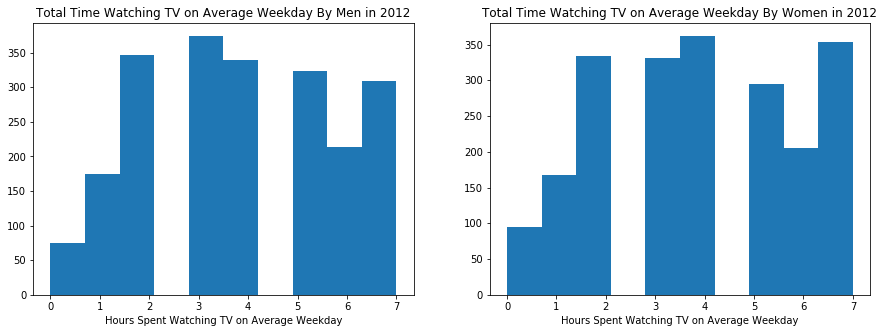

In [26]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(survey[survey['year']==6][survey['gndr']==1]['tvtot'])
plt.title('Total Time Watching TV on Average Weekday By Men in 2012')
plt.xlabel('Hours Spent Watching TV on Average Weekday')

plt.subplot(122)
plt.hist(survey[survey['year']==6][survey['gndr']==2]['tvtot'])
plt.title('Total Time Watching TV on Average Weekday By Women in 2012')
plt.xlabel('Hours Spent Watching TV on Average Weekday')

plt.show()

In [27]:
print('Shapiro-Wilk Test for Normality (TV Watching By Men in 2012):', '\n', 
              stats.shapiro(survey[survey['year']==6][survey['gndr']==1]['tvtot']))

Shapiro-Wilk Test for Normality (TV Watching By Men in 2012): 
 (0.9435817003250122, 6.201978792307913e-28)


In [28]:
print('Shapiro-Wilk Test for Normality (TV Watching By Women in 2012):', '\n', 
              stats.shapiro(survey[survey['year']==6][survey['gndr']==2]['tvtot']))

Shapiro-Wilk Test for Normality (TV Watching By Women in 2012): 
 (0.9392496347427368, 8.958801377763711e-29)


Both distributions are non-normal.

### Mood's Median Test for Non-Normally Distributed Independent Groups

In [29]:
stat, p, med, tbl = median_test(survey[survey['year']==6][survey['gndr']==1]['tvtot'],
                               survey[survey['year']==6][survey['gndr']==2]['tvtot'])

In [30]:
print('Test-statistic: {}, p-value: {}'.format(stat, p))

Test-statistic: 0.10426985208133409, p-value: 0.7467645942644672


### Kruskal-Wallis Test for Non-Normally Distributed Independent Groups

In [32]:
stat, p,  = kruskal(survey[survey['year']==6][survey['gndr']==1]['tvtot'],
                               survey[survey['year']==6][survey['gndr']==2]['tvtot'])

In [33]:
print('Test-statistic: {}, p-value: {}'.format(stat, p))

Test-statistic: 0.5781642893743878, p-value: 0.4470327617567298


At this point, we cannot reject the null hypothesis, that that men and women had no differences in TV watching time in 2012.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

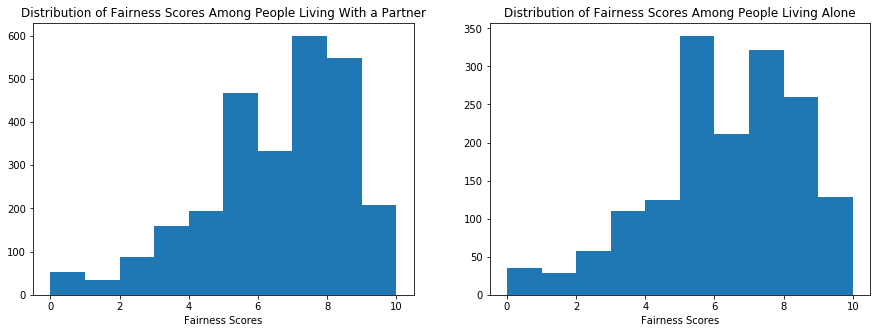

In [34]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(survey[survey['year']==6][survey['partner']==1]['pplfair'])
plt.title('Distribution of Fairness Scores Among People Living With a Partner')
plt.xlabel('Fairness Scores')

plt.subplot(122)
plt.hist(survey[survey['year']==6][survey['partner']==2]['pplfair'])
plt.title('Distribution of Fairness Scores Among People Living Alone')
plt.xlabel('Fairness Scores')

plt.show()

### Shapiro-Wilk Normality Test

In [35]:
print(stats.shapiro(survey[survey['year']==6][survey['partner']==1]['pplfair']))

(0.9414710402488708, 2.5099143623813975e-31)


In [36]:
print(stats.shapiro(survey[survey['year']==6][survey['partner']==2]['pplfair']))

(0.9563143849372864, 1.3659136923756896e-21)


Shapiro-Wilk tests returned very low p-values, therefore, we can assume that the distributions are not normal.

### Mood's Median Test for Non-Normally Distributed Independent Groups: A/B Test Two Independent Groups

In [37]:
stat, p, med, tbl = median_test(survey[survey['year']==6][survey['partner']==1]['pplfair'],
                     survey[survey['year']==6][survey['partner']==2]['pplfair'])

In [38]:
print('Test-statistic: {}, p-value: {}'.format(stat, p))

Test-statistic: 17.09731636723291, p-value: 3.551244969404655e-05


### Kruskal-Wallis Test for Non-Normally Distributed Independent Groups A/B Test Two Independent Groups

- Living With the Parter: 1
- Living Alone: 2

In [39]:
stat, p  = kruskal(survey[survey['year']==6][survey['partner']==1]['pplfair'],
                     survey[survey['year']==6][survey['partner']==2]['pplfair'])

In [40]:
print('Test-statistic: {}, p-value: {}'.format(stat, p))

Test-statistic: 14.005030418982718, p-value: 0.00018232220134479254


In [41]:
survey[survey['year']==6][survey['partner']==1]['pplfair'].median()

7.0

In [42]:
survey[survey['year']==6][survey['partner']==2]['pplfair'].median()

6.0

**Conclusion:**
Both tests Mood's Median Test and Kruskal-Wallis return small p-values (lower than 0.05). We can reject the null hypothesis that there is no difference between the populations. Living with a partner does seem to have a positive effect on fairness scores.

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

### Selected Countries: Norway, Spain, and Czech Republic

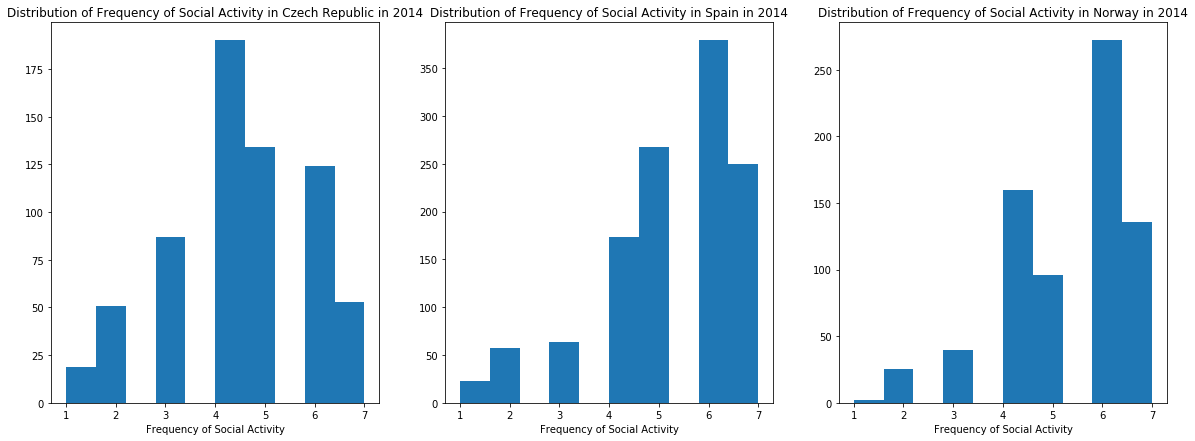

In [43]:
plt.figure(figsize=(20, 7))

plt.subplot(131)
plt.hist(survey[survey['year']==7][survey['cntry']=='CZ']['sclmeet'])
plt.title('Distribution of Frequency of Social Activity in Czech Republic in 2014')
plt.xlabel('Frequency of Social Activity')


plt.subplot(132)
plt.hist(survey[survey['year']==7][survey['cntry']=='ES']['sclmeet'])
plt.title('Distribution of Frequency of Social Activity in Spain in 2014')
plt.xlabel('Frequency of Social Activity')

plt.subplot(133)
plt.hist(survey[survey['year']==7][survey['cntry']=='NO']['sclmeet'])
plt.title('Distribution of Frequency of Social Activity in Norway in 2014')
plt.xlabel('Frequency of Social Activity')


plt.show()

#### Keys to the Social Actitivies Scores:

1: Never, 2: Less than once a month, 3: Once a month, 4: Several times a month, 5: Once a week, 6: Several times a week, 7: Every day

### Shapiro-Wilk Normality Test

In [44]:
stats.shapiro(survey[survey['year']==7][survey['cntry']=='CZ']['sclmeet'])

(0.9454979300498962, 7.872136170467177e-15)

In [45]:
stats.shapiro(survey[survey['year']==7][survey['cntry']=='ES']['sclmeet'])

(0.888232946395874, 9.841071088993719e-29)

In [46]:
stats.shapiro(survey[survey['year']==7][survey['cntry']=='NO']['sclmeet'])

(0.8881818056106567, 1.422473605641294e-22)

The normality test shows that the distributions are not normal.

### Mood's Median Test for Non-Normally Distributed Independent Groups: A/B/C Test Three Independent Groups

In [47]:
stat, p, med, tbl = median_test(survey[survey['year']==7][survey['cntry']=='CZ']['sclmeet'],
                                 survey[survey['year']==7][survey['cntry']=='ES']['sclmeet'],
                                 survey[survey['year']==7][survey['cntry']=='NO']['sclmeet'])

In [48]:
print('Test-statistic: {}, p-value: {}'.format(stat, p))

Test-statistic: 137.0313014741693, p-value: 1.7540055405206635e-30


Mood's Median Test shows that there are differences in the social activities accross the countries.

In [49]:
three_countries = ['CZ', 'ES', 'NO']

In [50]:
import itertools

In [51]:
list(itertools.combinations(three_countries, 2))

[('CZ', 'ES'), ('CZ', 'NO'), ('ES', 'NO')]

In [52]:
combos = list(itertools.combinations(three_countries, 2))

In [53]:
for combo in combos:
    print('Mood\'s Median Test for', combo[0], 'and', combo[1],':', median_test(survey[survey['year']==7][survey['cntry']==combo[0]]['sclmeet'],
                        survey[survey['year']==7][survey['cntry']==combo[1]]['sclmeet'])[0:2])

Mood's Median Test for CZ and ES : (104.6716333489829, 1.4415004465648213e-24)
Mood's Median Test for CZ and NO : (113.71987767816833, 1.500810058192904e-26)
Mood's Median Test for ES and NO : (1.030145931461536, 0.3101243950349878)


In [54]:
print('Median social activities score in Czech: {}'.format(survey[survey['year']==7][survey['cntry']=='CZ']['sclmeet'].median()))

Median social activities score in Czech: 4.0


In [55]:
print('Median social activities score in Spain: {}'.format(survey[survey['year']==7][survey['cntry']=='ES']['sclmeet'].median()))

Median social activities score in Spain: 6.0


In [56]:
print('Median social activities score in Norway: {}'.format(survey[survey['year']==7][survey['cntry']=='NO']['sclmeet'].median()))

Median social activities score in Norway: 6.0


** Conclusion:** Mood's median test showed that the differences in terms of social activity between Czech and Spain as well as differences between Czech and Norway are statistically significant. People in Czech are less likely to be socially active.

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

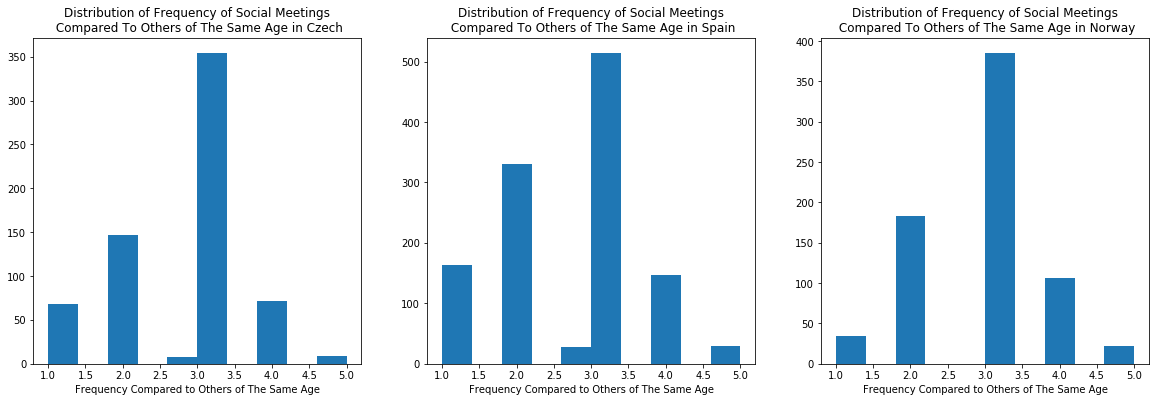

In [57]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.hist(survey[survey['year']==7][survey['cntry']=='CZ']['sclact'])
plt.title('Distribution of Frequency of Social Meetings\n Compared To Others of The Same Age in Czech')
plt.xlabel('Frequency Compared to Others of The Same Age')


plt.subplot(132)
plt.hist(survey[survey['year']==7][survey['cntry']=='ES']['sclact'])
plt.title('Distribution of Frequency of Social Meetings\n Compared To Others of The Same Age in Spain')
plt.xlabel('Frequency Compared to Others of The Same Age')

plt.subplot(133)
plt.hist(survey[survey['year']==7][survey['cntry']=='NO']['sclact'])
plt.title('Distribution of Frequency of Social Meetings\n Compared To Others of The Same Age in Norway')
plt.xlabel('Frequency Compared to Others of The Same Age')

plt.show()


### Shaprio-Wilk Normality Test

None of the distributions pass the tests for normality. We could stil use non-parametric tests to see if the populations are different.

In [58]:
print('Normality test for Czech: {}'.format(
stats.shapiro(survey[survey['year']==7][survey['cntry']=='CZ']['sclact'])))

print('Normality test for Spain: {}'.format(
stats.shapiro(survey[survey['year']==7][survey['cntry']=='ES']['sclact'])))

print('Normality test for Norway: {}'.format(
stats.shapiro(survey[survey['year']==7][survey['cntry']=='NO']['sclact'])))

Normality test for Czech: (0.8530383706092834, 2.909881476280514e-24)
Normality test for Spain: (0.8946458697319031, 5.039523107579748e-28)
Normality test for Norway: (0.8678725957870483, 2.398206966061988e-24)


### Kruskal-Wallis Test

In [64]:
combos

[('CZ', 'ES'), ('CZ', 'NO'), ('ES', 'NO')]

In [59]:
for combo in combos:
    print('Kruskal-Wallis test result', combo[0], 'and', combo[1],':', kruskal(survey[survey['year']==7][survey['cntry']==combo[0]]['sclact'],
                        survey[survey['year']==7][survey['cntry']==combo[1]]['sclact']))

Kruskal-Wallis test result CZ and ES : KruskalResult(statistic=6.108330835040009, pvalue=0.013454613643765932)
Kruskal-Wallis test result CZ and NO : KruskalResult(statistic=8.562632941190861, pvalue=0.003431328120777815)
Kruskal-Wallis test result ES and NO : KruskalResult(statistic=32.61116328247317, pvalue=1.1256634703906626e-08)


In [61]:
print('Mean Social Activity Score in Czech: {}'.format(survey[survey['year']==7][survey['cntry']=='CZ']['sclact'].mean()))
print('Mean Social Activity Score in Spain: {}: '.format(survey[survey['year']==7][survey['cntry']=='ES']['sclact'].mean()))
print('Mean Social Activity Score in Norway: {}'.format(survey[survey['year']==7][survey['cntry']=='NO']['sclact'].mean()))

Mean Social Activity Score in Czech: 2.703634543178974
Mean Social Activity Score in Spain: 2.619926094757771: 
Mean Social Activity Score in Norway: 2.859097127222982


In [62]:
print('Median Social Activity Score in Czech: {}'.format(survey[survey['year']==7][survey['cntry']=='CZ']['sclact'].median()))
print('Median Social Activity Score in Spain: {} '.format(survey[survey['year']==7][survey['cntry']=='ES']['sclact'].median()))
print('Median Social Activity Score in Norway: {}'.format(survey[survey['year']==7][survey['cntry']=='NO']['sclact'].median()))

Median Social Activity Score in Czech: 3.0
Median Social Activity Score in Spain: 3.0 
Median Social Activity Score in Norway: 3.0


Kruskal-Wallis test shows that there are statistically significant differences between all three countries.